In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report


from tensorflow import keras
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D,Dropout

import warnings
warnings.filterwarnings('ignore')

In [31]:
from tensorflow.keras.datasets import mnist

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# basic checks

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
y_train.shape

(60000,)

In [35]:
x_test.shape

(10000, 28, 28)

In [36]:
y_test.shape

(10000,)

# EDA

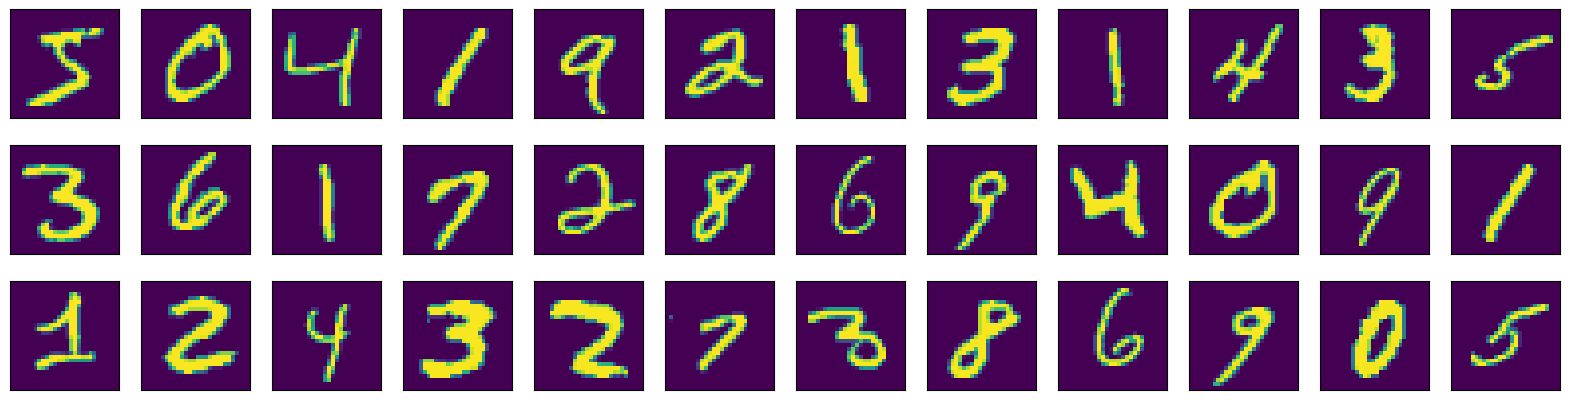

In [37]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

The graph showcases a diverse range of handwritten digits (0-9) from the MNIST dataset, highlighting the complexity of the image classification task.
The images display variability in handwriting styles, sizes, and orientations, making classification more challenging.
The consistent image size and formatting indicate a well-curated dataset, ready for training machine learning models.

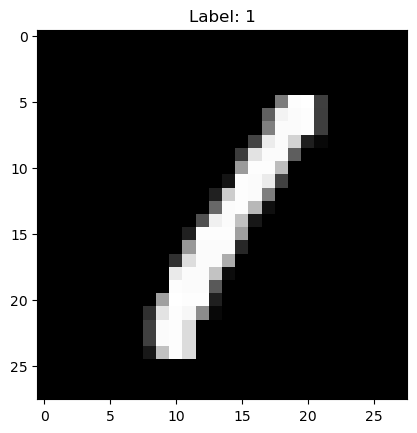

In [38]:
plt.imshow(x_train[3], cmap='gray')
plt.title(f"Label: {y_train[3]}")
plt.show()

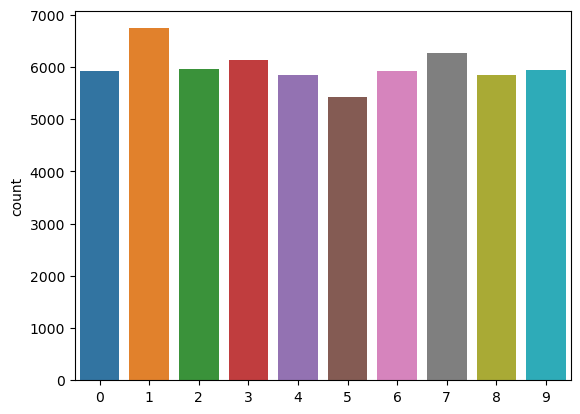

In [39]:
sns.countplot(x = y_train)
plt.show()

The countplot displays a balanced distribution of digit labels (0-9) in the training dataset.
Each digit label has a similar frequency, indicating no class imbalance issues.
This balance is ideal for training machine learning models, ensuring equal representation of all classes.

# Data Preprocessing¶

In [40]:
# Flattening
#For Machine learning models like SVM,KNN , flatten the images into 1D vectors

In [41]:
x_train_flat= x_train.reshape(x_train.shape[0],28*28)

In [42]:
x_test_flat = x_test.reshape(x_test.shape[0],28*28)

reshape flattens the 3D array into 1D array

In [43]:
# y_train,y_test should remain as it is, since they are already 1D arrays

### Normalize the Data


scale pixel values to the range[0,1] to help with model convergence

In [44]:
x_train_normalized= x_train_flat.astype('float32')/255.0

In [45]:
x_test_normalized = x_test_flat.astype('float32')/255.0

converts the data type to 32 bit floating point numbers. 255.0 scales the pixel values from [0,255] to [0,1] which is common normalization technique for image data



# Reshaping for CNN

In [46]:
x_train_cnn = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/ 255.0

In [47]:
x_test_cnn = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/ 255.0

###Handling with nullvalues and outliers
This dataset is clean, with no missing values or significant outliers, so no special handling is required for this dataset

##Scaling
scaling is already handled by the normalization step

##Balancing
y_train contains the target labels (the actual digit classes), which is what we are interested in to check if the dataset is balanced
x_train contains the image data, which doesn’t have class information. Each image corresponds to one label in y_train, so if y_train is balanced, x_train will be balanced as well by association.

In [48]:
from collections import Counter

In [49]:
Counter(y_train)

Counter({1: 6742,
         7: 6265,
         3: 6131,
         2: 5958,
         9: 5949,
         0: 5923,
         6: 5918,
         8: 5851,
         4: 5842,
         5: 5421})

Although the number of samples for each digit class varies slightly, the differences are not significant enough to cause concern for class imbalance in the MNIST dataset. Thus, SMOTE or other balancing techniques aren't required.

# MODEL CREATION

Splitting data into Training and Validation sets

When working with unstructured data, it's often recommended to have a separate validation set.This is because:

1.Unstructured data can be noisy or have varying quality
2.Models can easily overfit to the training data
3.Hyperparameter tuning can be more sensitive to the data distribution

In [50]:
x_train_norm,x_val_norm,y_train_norm,y_val_norm = train_test_split(x_train_normalized,y_train,test_size = 0.2,random_state = 42)

In [51]:
x_train_cnn,x_val_cnn,y_train_cnn,y_val_cnn = train_test_split(x_train_cnn,y_train,test_size = 0.2,random_state=42)

In [52]:
x_train_norm.shape, x_val_norm.shape,y_train_norm.shape,y_val_norm.shape

((48000, 784), (12000, 784), (48000,), (12000,))